create our model

In [ ]:

import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))
#create encoder part
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded=layers.MaxPooling2D((2, 2), padding='same')(x)

#create decoder part

x = layers.UpSampling2D((2, 2))(encoded)
x=layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x=layers.UpSampling2D((2, 2))(x)
x=layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


download mnist dataset

In [ ]:

from keras.datasets import mnist
import numpy as np
#load data
(x_train, _), (x_test, _) = mnist.load_data()
#normalize data and reshape
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#train the model 

autoencoder.fit(x_train, x_train,
                epochs=50, #5, #50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))



In [ ]:
#save model
autoencoder.save("model.h5")

In [ ]:
#Load model

autoencoder=keras.models.load_model("model.h5")

In [ ]:

encoder=keras.Model(input_img,encoded)


input_decoder = keras.Input(shape=(7, 7, 8))
x = layers.UpSampling2D((2, 2))(input_decoder)
x=layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x=layers.UpSampling2D((2, 2))(x)
x=layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)



decoder=keras.Model(input_decoder,decoded)
#decoder.summary()
#set weights from autoencoder (encoder part) to separated encoder

for i in range(0,5):
    encoder.layers[i].set_weights(autoencoder.layers[i].get_weights())

#set weights from autoencoder (decoder part) to separated decoder
for i in range(1,6):
  decoder.layers[i].set_weights(autoencoder.layers[i+4].get_weights())
  



In [ ]:
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 8)        0     

In [ ]:
np.array(autoencoder.layers[1].get_weights()[0]).shape

(3, 3, 1, 16)

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

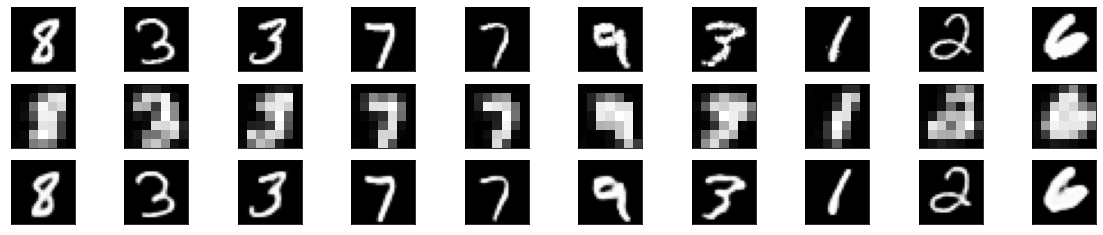

In [ ]:
import matplotlib.pyplot as plt
import random
n=10
indexes=random.sample(range(0, x_test.shape[0]), n+1)
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[indexes[i]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display original
    ax = plt.subplot(3, n, i + n)
    plt.imshow(encoded_imgs[indexes[i],:,:,4].reshape(7, 7))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[indexes[i]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



